In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [ ]:
# Step 1: 模擬數據
np.random.seed(42)
# 正常數據 (製程穩定情況下的數據)
# loc=50 是正態分佈的 平均值（mean 或期望值），即數據的中心值。在這裡，生成的數據平均值大約是 50。
# scale=5 是正態分佈的 標準差（standard deviation）。標準差表示數據的分散程度，數值越大，數據分佈越分散。
# 在這裡，數據的標準差是 5，表示大多數數據會落在平均值 50 附近，且約 68% 的數據會位於範圍 [45, 55] 之間。
# np.random.normal 返回的是一個 NumPy 陣列，包含了符合上述正態分佈的隨機數
normal_data = np.random.normal(loc=50, scale=5, size=500)

print('normal_data:\n',normal_data)
print(len(normal_data))

# 異常數據 (製程出現波動時的數據)
# scale=10 在這裡，標準差為 10，表示（約 68% 的數據) 會落在範圍 [60, 80] 附近
anomalous_data = np.random.normal(loc=70, scale=10, size=50)

print('anomalous_data:\n',anomalous_data)
print(len(anomalous_data))

# 合併數據
process_data = np.concatenate([normal_data, anomalous_data])

print('process_data:\n',process_data)
print(len(process_data))

timestamps = np.arange(len(process_data))

# 將數據存入 DataFrame
df = pd.DataFrame({'Timestamp': timestamps, 'Process_Value': process_data})

print(df)

normal_data:
 [52.48357077 49.30867849 53.23844269 57.61514928 48.82923313 48.82931522
 57.89606408 53.83717365 47.65262807 52.71280022 47.68291154 47.67135123
 51.20981136 40.43359878 41.37541084 47.18856235 44.9358444  51.57123666
 45.45987962 42.93848149 57.32824384 48.8711185  50.33764102 42.87625907
 47.27808638 50.55461295 44.24503211 51.87849009 46.99680655 48.54153125
 46.99146694 59.26139092 49.93251388 44.71144536 54.11272456 43.89578175
 51.04431798 40.20164938 43.35906976 50.98430618 53.6923329  50.85684141
 49.42175859 48.49448152 42.60739005 46.40077896 47.69680615 55.28561113
 51.71809145 41.18479922 51.62041985 48.0745886  46.61539    53.05838144
 55.15499761 54.6564006  45.80391238 48.45393812 51.65631716 54.87772564
 47.60412881 49.07170512 44.46832513 44.01896688 54.06262911 56.78120014
 49.63994939 55.01766449 51.80818013 46.77440123 51.80697803 57.69018283
 49.8208698  57.82321828 36.90127448 54.10951252 50.43523534 48.50496325
 50.45880388 40.06215543 48.90164056 

In [ ]:
# UCL 與 LCL 的範圍： 正常情況下，數據應該大部分落在 [LCL, UCL] 範圍內。 如果數據點超出這個範圍，則意味著製程可能失控，需要進行調查或調整。
# 99.73% 覆蓋率：在正態分佈下，±3 個標準差的範圍涵蓋了大約 99.73% 的數據，表示數據中大多數的自然變異。
# 製程監控應用：在實際製程中，這些界限幫助判定製程是否受控，並能快速檢測出異常點（如：設備故障、操作失誤）。

# Step 2: 計算 SPC 控制界限 (平均值 ± 3個標準差)
# 計算 normal_data 的 平均值 -> 中心基準線
mean = np.mean(normal_data)
# 計算 normal_data 的 標準差 -> 標準差（Standard Deviation） 表示數據的分散程度，即數據偏離平均值的程度
# 應用：在 SPC 中，標準差用於設置控制界限，反映製程的自然變異範圍。
std = np.std(normal_data)
# 計算 上控制界限（UCL），公式為：平均值 + 3個標準差
# 在正態分佈中，大約 99.73% 的數據會落在 (平均值 ± 3 個標準差) 的範圍內。 ->  上控制界限表示數據的「正常上限」，超過此值的數據被視為「異常」。
ucl = mean + 3 * std  # Upper Control Limit
# 計算 下控制界限（LCL），公式為：平均值 - 3個標準差 -> 下控制界限表示數據的「正常下限」，低於此值的數據被視為「異常」
lcl = mean - 3 * std  # Lower Control Limit

print('平均值：',mean)
print('標準差：',std)
print('上界線：',ucl)
print('下界線：',lcl)

平均值： 50.03418997294323
標準差： 4.901357514983134
上界線： 64.73826251789264
下界線： 35.33011742799383


In [8]:
# 標記 SPC 超限的異常
df['SPC_Anomaly'] = (df['Process_Value'] > ucl) | (df['Process_Value'] < lcl)

print(df['SPC_Anomaly'])

0      False
1      False
2      False
3      False
4      False
       ...  
545    False
546     True
547     True
548     True
549    False
Name: SPC_Anomaly, Length: 550, dtype: bool


In [9]:
# 找出 SPC_Anomaly 為 True 的列
anomalies = df[df['SPC_Anomaly'] == True]

# 計算 True 的總數
anomaly_count = anomalies.shape[0]

# 印出結果
print(anomalies)  # 顯示所有異常的列
print(f"總計異常數量: {anomaly_count}")

     Timestamp  Process_Value  SPC_Anomaly
209        209      69.263657         True
262        262      33.793663         True
478        478      65.394404         True
500        500      79.261775         True
501        501      89.094166         True
503        503      75.629692         True
505        505      65.128746         True
508        508      70.485216         True
510        510      72.704568         True
511        511      69.497619         True
512        512      67.610520         True
515        515      77.553912         True
516        516      75.009172         True
518        518      70.993323         True
519        519      77.513871         True
521        521      75.433602         True
523        523      75.705987         True
527        527      70.480849         True
528        528      72.597225         True
530        530      76.385925         True
532        532      69.339202         True
535        535      70.473987         True
537        

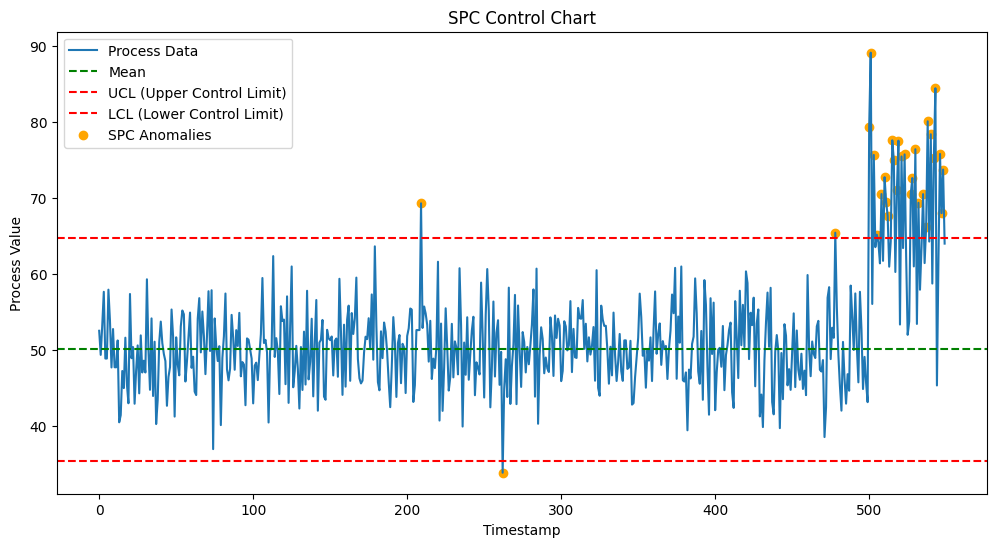

In [10]:
# Step 3: 可視化 SPC 控制圖
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['Process_Value'], label='Process Data')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Upper Control Limit)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Lower Control Limit)')
plt.scatter(df[df['SPC_Anomaly']]['Timestamp'], df[df['SPC_Anomaly']]['Process_Value'], color='orange', label='SPC Anomalies')
plt.title('SPC Control Chart')
plt.xlabel('Timestamp')
plt.ylabel('Process Value')
plt.legend()
plt.show()

In [ ]:
# Step 4: 使用 K-Means 進行分群
# 數據標準化
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Process_Value']])

print(scaled_data)

[[ 1.18228438e-01]
 [-3.13517310e-01]
 [ 2.20881604e-01]
 [ 8.16059109e-01]
 [-3.78715900e-01]
 [-3.78704737e-01]
 [ 8.54260018e-01]
 [ 3.02301546e-01]
 [-5.38719511e-01]
 [ 1.49400784e-01]
 [-5.34601338e-01]
 [-5.36173395e-01]
 [-5.49869536e-02]
 [-1.52041745e+00]
 [-1.39234276e+00]
 [-6.01826661e-01]
 [-9.08168204e-01]
 [-5.83762024e-03]
 [-8.36905950e-01]
 [-1.17978465e+00]
 [ 7.77043548e-01]
 [-3.73020012e-01]
 [-1.73591240e-01]
 [-1.18824612e+00]
 [-5.89652510e-01]
 [-1.44085765e-01]
 [-1.00211006e+00]
 [ 3.59450137e-02]
 [-6.27903058e-01]
 [-4.17839766e-01]
 [-6.28629179e-01]
 [ 1.03992744e+00]
 [-2.28683479e-01]
 [-9.38683675e-01]
 [ 3.39773033e-01]
 [-1.04960375e+00]
 [-7.74919895e-02]
 [-1.55195968e+00]
 [-1.12258989e+00]
 [-8.56528451e-02]
 [ 2.82605011e-01]
 [-1.02986464e-01]
 [-2.98139828e-01]
 [-4.24237943e-01]
 [-1.22480895e+00]
 [-7.08955376e-01]
 [-5.32711844e-01]
 [ 4.99270977e-01]
 [ 1.41327988e-02]
 [-1.41826356e+00]
 [ 8.50679314e-04]
 [-4.81338143e-01]
 [-6.7977095

In [14]:
# 應用 K-Means 模型
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print(df['Cluster'])
print(df)

0      0
1      0
2      0
3      1
4      0
      ..
545    1
546    1
547    1
548    1
549    1
Name: Cluster, Length: 550, dtype: int32
     Timestamp  Process_Value  SPC_Anomaly  Cluster
0            0      52.483571        False        0
1            1      49.308678        False        0
2            2      53.238443        False        0
3            3      57.615149        False        1
4            4      48.829233        False        0
..         ...            ...          ...      ...
545        545      62.031047        False        1
546        546      75.770721         True        1
547        547      67.969546         True        1
548        548      73.711459         True        1
549        549      63.960148        False        1

[550 rows x 4 columns]


C:\Users\a0822\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
# 將異常群標記為 "1"
cluster_means = df.groupby('Cluster')['Process_Value'].mean()

print(cluster_means)

Cluster
0    49.113599
1    64.062628
Name: Process_Value, dtype: float64


In [16]:
anomalous_cluster = cluster_means.idxmax()  # 假設異常數據的平均值較大

print(anomalous_cluster)

1


In [17]:
df['ML_Anomaly'] = df['Cluster'] == anomalous_cluster

print(df['ML_Anomaly'])

0      False
1      False
2      False
3       True
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: ML_Anomaly, Length: 550, dtype: bool


In [18]:
df

,Timestamp,Process_Value,SPC_Anomaly,Cluster,ML_Anomaly
0,0,52.483571,False,0,False
1,1,49.308678,False,0,False
2,2,53.238443,False,0,False
3,3,57.615149,False,1,True
4,4,48.829233,False,0,False
...,...,...,...,...,...
545,545,62.031047,False,1,True
546,546,75.770721,True,1,True
547,547,67.969546,True,1,True
548,548,73.711459,True,1,True


In [20]:
# Step 5: 結合 SPC 和分群結果檢測異常
df['Combined_Anomaly'] = df['SPC_Anomaly'] | df['ML_Anomaly']

In [21]:
df['Combined_Anomaly']

0      False
1      False
2      False
3       True
4      False
       ...  
545     True
546     True
547     True
548     True
549     True
Name: Combined_Anomaly, Length: 550, dtype: bool

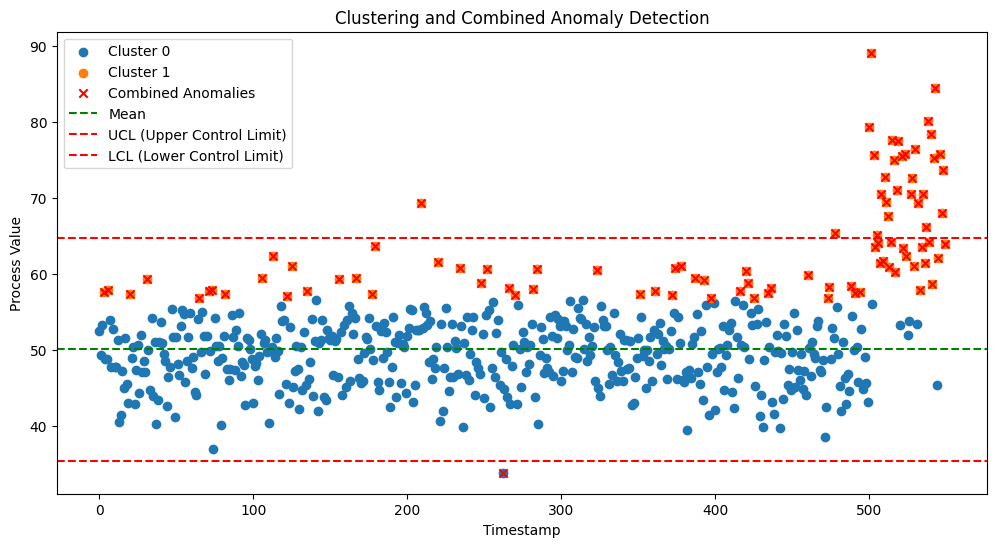

In [22]:
# Step 6: 可視化分群與異常
plt.figure(figsize=(12, 6))
for cluster_id in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Timestamp'], cluster_data['Process_Value'], label=f'Cluster {cluster_id}')

plt.scatter(df[df['Combined_Anomaly']]['Timestamp'], df[df['Combined_Anomaly']]['Process_Value'], color='red', label='Combined Anomalies', marker='x')
plt.axhline(mean, color='green', linestyle='--', label='Mean')
plt.axhline(ucl, color='red', linestyle='--', label='UCL (Upper Control Limit)')
plt.axhline(lcl, color='red', linestyle='--', label='LCL (Lower Control Limit)')
plt.title('Clustering and Combined Anomaly Detection')
plt.xlabel('Timestamp')
plt.ylabel('Process Value')
plt.legend()
plt.show()

### 1. 製程異常的檢測：
圖中標記為紅色的「Combined Anomalies」(紅色交叉點) 表示綜合了 SPC 控制圖 和 分群模型 的異常檢測結果。
可以觀察到：
多數異常數據分佈在控制界限（UCL 和 LCL）之外，特別是接近 UCL（上控制界限）。
在圖的右側，異常數據點的密度明顯增加，說明這段時間內製程可能存在持續的異常狀況（例如設備故障或參數漂移）。

### 2. 分群模型的結果：
圖中的分群結果顯示為兩個群：
Cluster 0 (藍色點)：代表正常的製程數據。
Cluster 1 (橙色點)：主要集中在異常區域，代表可能的異常數據群。
可以看到：
Cluster 1 與「Combined Anomalies」高度重合，說明分群模型能有效捕捉異常模式。
Cluster 0 的分佈主要集中在平均值附近，分佈均勻，表明這部分數據符合正常製程。

### 3. SPC 的控制圖作用：
控制界限 (UCL 和 LCL)：
UCL 和 LCL 清楚地標出製程的正常範圍。
多數數據落在控制界限內，但右側異常區域有大量數據超出 UCL，說明製程失控。
平均值 (綠色虛線)：
多數正常數據圍繞平均值波動，顯示出一定的製程穩定性。

### 4. 製程狀態的判斷：
整體而言，製程在大部分時間內保持穩定，但右側（時間戳大於 450）出現了持續的異常波動。
可能的原因：
製程參數（如溫度、壓力等）在後期出現了漂移。
設備性能或材料特性發生了變化。

### 5. 綜合分析的效果：
將 SPC 和分群模型結合有助於提高異常檢測的準確性：
SPC 提供了基於統計的異常界限。
分群模型捕捉了隱藏的異常模式（例如，某些數據點雖然未超出 UCL，但仍被判定為異常）。
圖中的紅色異常點和橙色 Cluster 1 表明模型能夠識別 SPC 無法單獨檢測出的異常。

### 建議：
進一步調查異常原因：
右側異常數據可能與製程變數（如溫度或壓力）波動相關，需對這段時間的製程數據進行深入分析。
強化設備維護：
如果異常是由於設備問題引起的，建議檢查相關設備的運行狀態。
模型改進與優化：
可以嘗試加入更多製程變數，進一步提升分群模型的準確性。